**1. Импортирование и обработка данных.**


1.1 Скачиваем Датасет

---
В данном датасете представленны всевозможные данные о раунде в определеный
момент времени, а также исходы раундов.


датасет взят отсюда: https://www.openml.org/search?type=data&sort=runs&id=43430&status=active

In [1]:
import requests

url = "https://www.openml.org/data/download/22102255/dataset"
r = requests.get(url, allow_redirects=True)

In [2]:
with open("dataset.txt", "wb") as f:
  f.write(r.content)

1.2.Извлекаем признаки и данные.

In [3]:
import pandas as pd

In [4]:
data = []

with open('dataset.txt', 'r')as f:
  for line in f.read().split("\n"):
    if line.startswith("@") or line.startswith("%") or line == "":
      continue
    data.append(line)


In [5]:
columns = []

with open("dataset.txt", "r") as f:
  for line in f.read().split("\n"):
    if line.startswith("@ATTRIBUTE"):
      columns.append(line.split(" ")[1])

In [6]:
with open("df.csv", "w") as f:
  f.write(",".join(columns))
  f.write("\n")
  f.write("\n".join(data))

In [7]:
df = pd.read_csv("df.csv")
df.columns = columns

In [8]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


3. Обработка данных


In [9]:
df['t_win'] = df.round_winner.astype("category").cat.codes

Преобразуем категориальный признак "round winner" в числовое значение. t_win =1; ct_win=0

In [10]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,t_win
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T,1
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T,1


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем только числовые колонки
numeric_df = df[columns + ["t_win"]].select_dtypes(include=['number'])

#смотрим корреляцию
correlations = numeric_df.corr()
print(correlations["t_win"].apply(abs).sort_values(ascending=False).iloc[:30])

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps                   0.136694
ct_money        

In [12]:
selected_columns = []
#массив, только с числовыми колонками
for col in numeric_df:
  selected_columns.append(col)

df_selected = df[selected_columns]


In [ ]:
df_selected

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,t_win
0,175.00,0.0,0.0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


Это 30 признаков, имеющих наибольшее влияние на t_win

In [29]:
df_selected.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,t_win
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750,0.509811
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162,0.499906
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000,1.000000


Новая таблица, с признаками, имеющими влияние более 0.15, чтобы посмотреть на распределение.


In [ ]:
df_short = []

In [ ]:
selected_columns = []

for col in numeric_df:
  if abs(correlations[col]["t_win"])>0.15:
    selected_columns.append(col)

df_short = df[selected_columns]

In [ ]:
df_short

,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_awp,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_win
0,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
2,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
3,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
4,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,200.0,195.0,359.0,2.0,4.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1
122406,500.0,95.0,175.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,2.0,1.0,0.0,1
122407,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,1
122408,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,1


Построим гистограмму и посмотрим на распределение

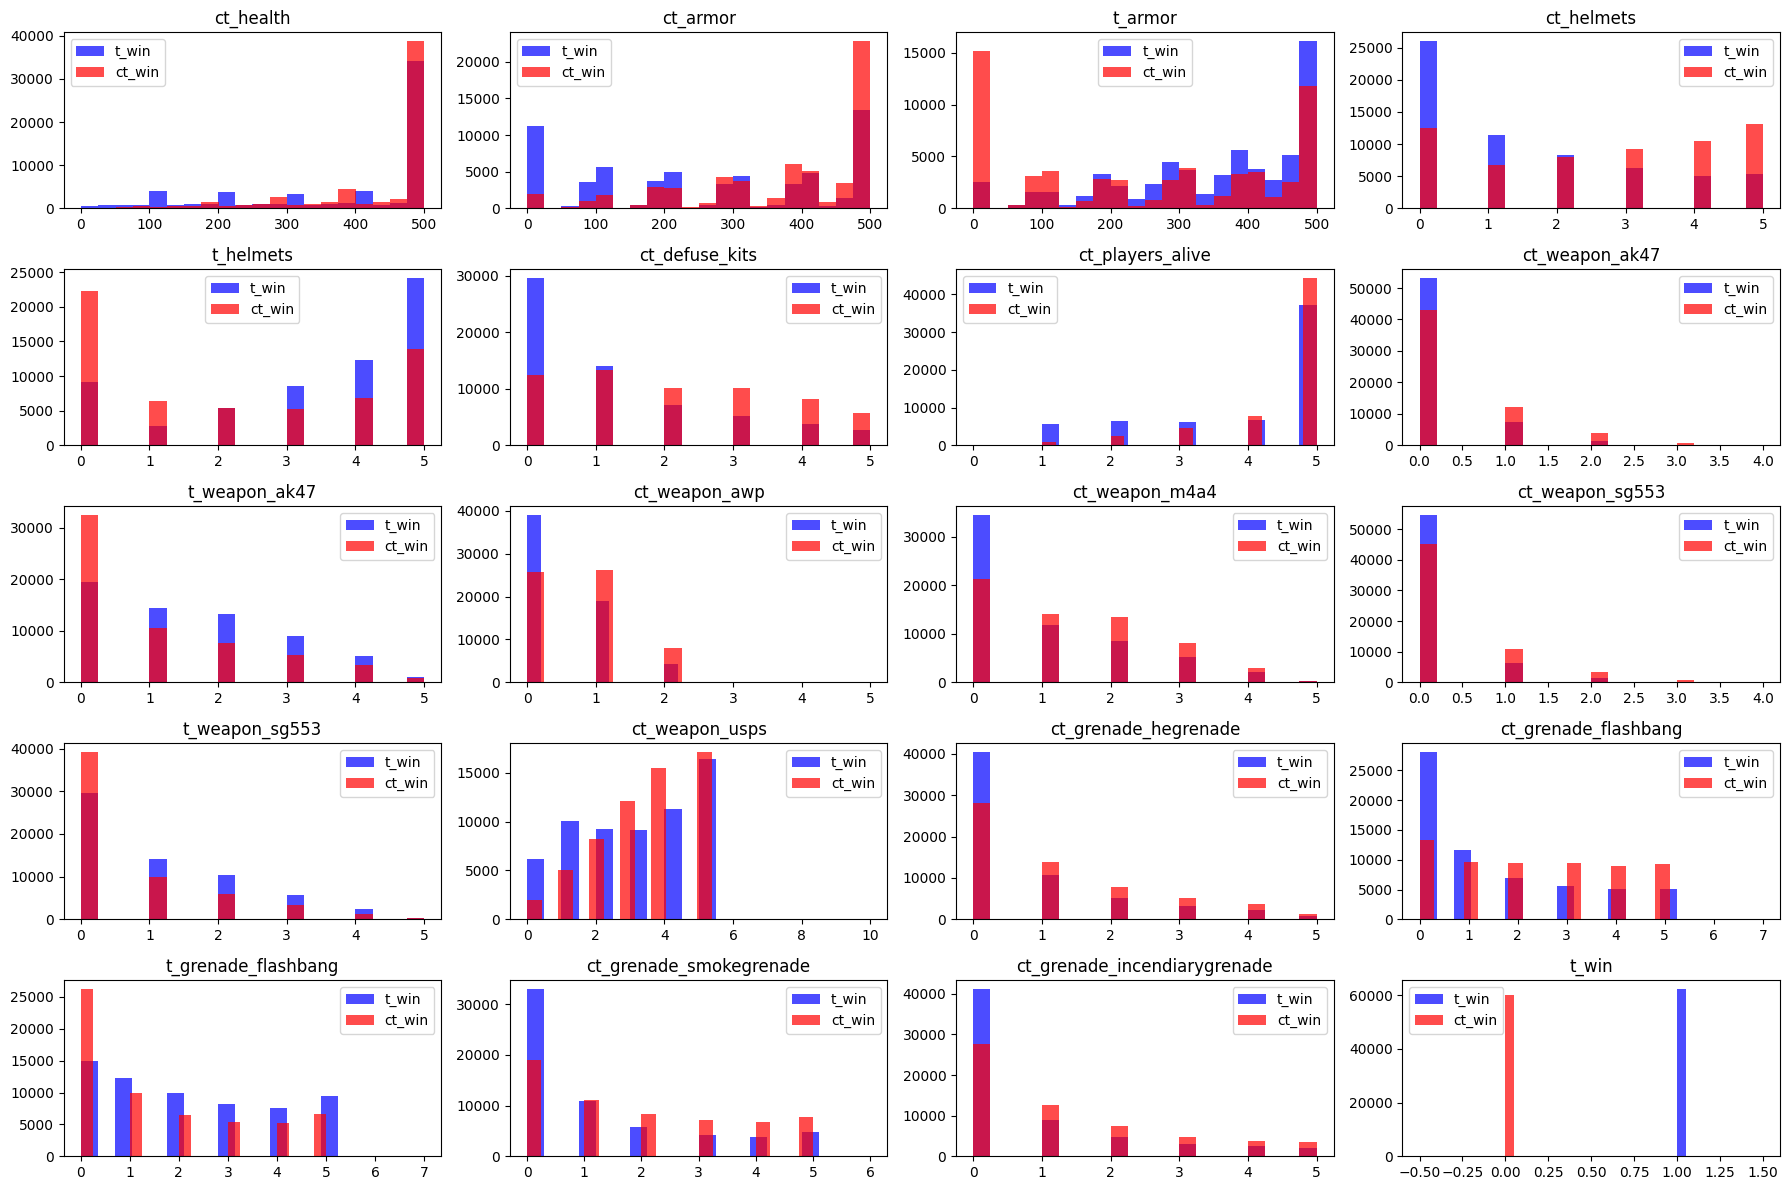

In [ ]:
features = [col for col in df_short.columns]

fig, axes = plt.subplots(5, 4, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(df_short[df_short['t_win'] == 1][feature], alpha=0.7, color='blue', label='t_win', bins=20)
    axes[i].hist(df_short[df_short['t_win'] == 0][feature], alpha=0.7, color='red', label='ct_win', bins=20)
    axes[i].set_title(feature)
    axes[i].legend()

plt.tight_layout()
plt.show()

Видим большие выбросы.

Соотношение 0 и 1 переменной t_win примерно одинаковое, так что как метрику качества возьмем accuracy и f1


<Axes: >

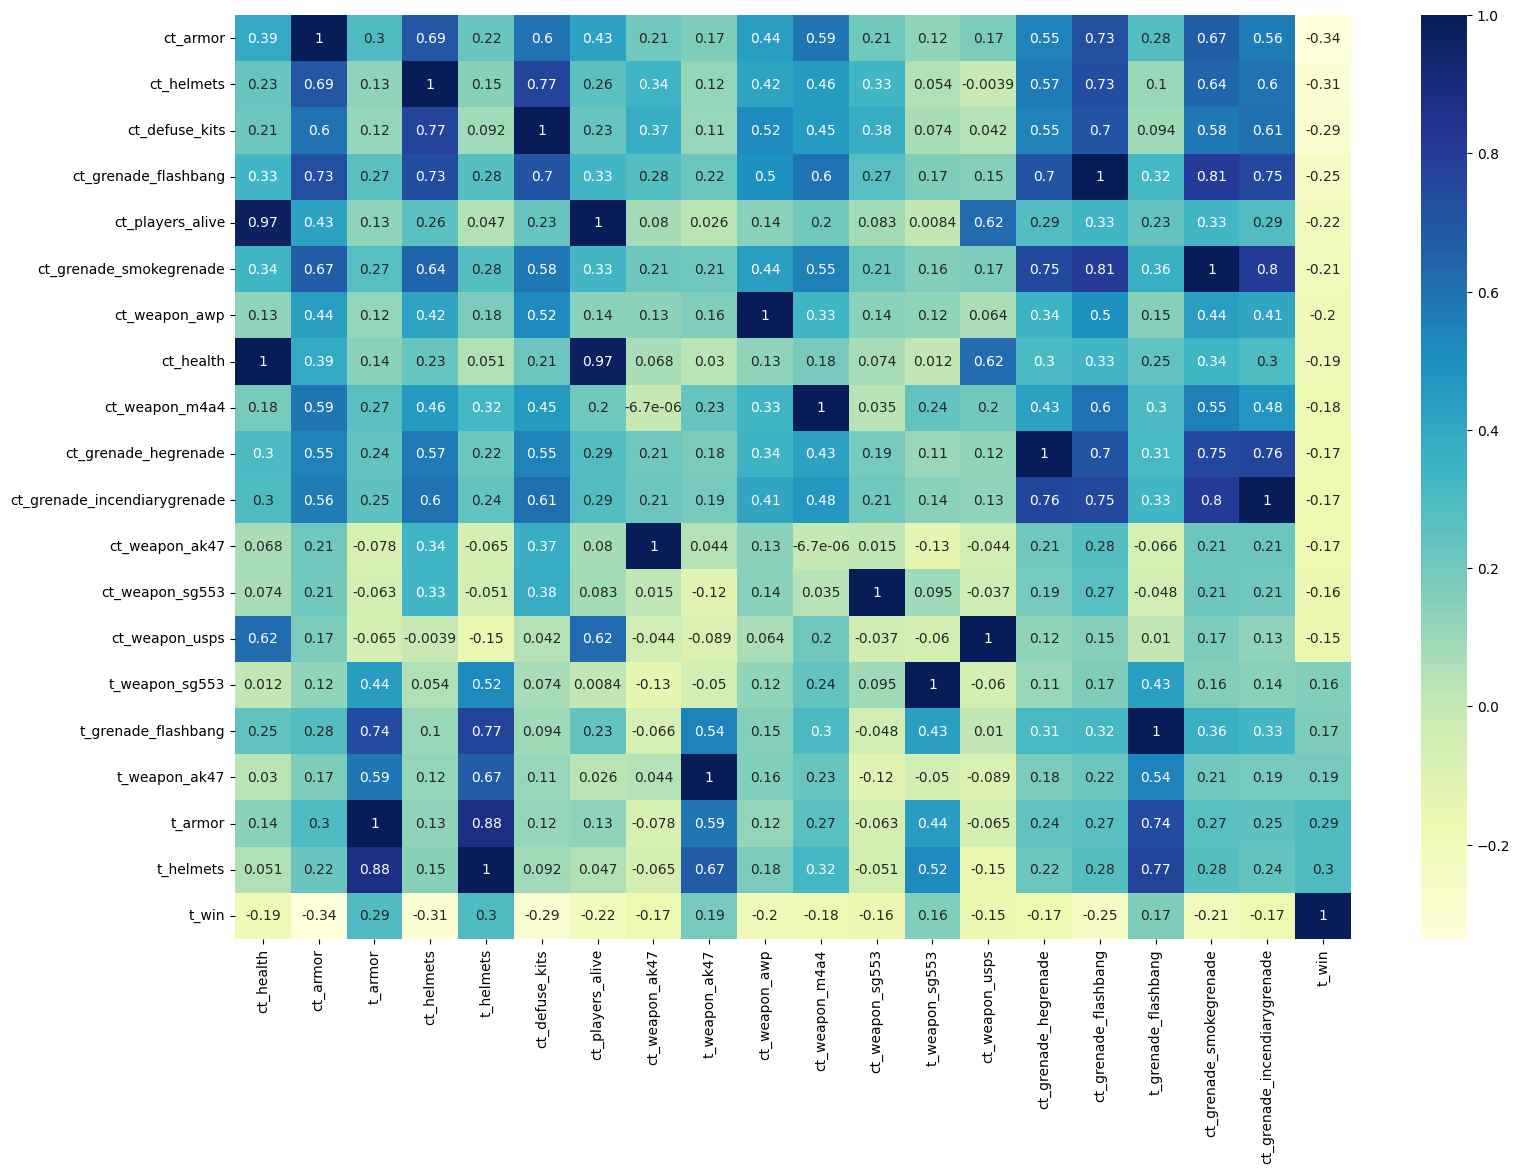

In [ ]:
#Делаю хитмап
plt.figure(figsize=(18,12))
sns.heatmap(df_short.corr().sort_values(by="t_win"), annot = True, cmap="YlGnBu")

**1.3 Используем PCA(Principal component analysis), чтобы избавиться от высококоррелирующих признаков.**


---

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X, y = df_selected.drop(["t_win"], axis=1), df_selected["t_win"]

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)#оставляем 95% дисперсии
X_pca = pca.fit_transform(X_scaled)
print (f'уменьшили с {X.shape[1]} до {X_pca.shape[1]}')

уменьшили с 94 до 68


**2. Машинное обучение.**

---
Попробуем 3 различные модели, чтобы посмотреть, какая даст наилучший результат:

1. KNN (k nearest neighbors)

2. Random forest(begging)

3. Gradient boosting


---


**Разделение данных на обучающую и валидационную выборки**

Train/test split:

- Train выборка = 80%

- Test выборка = 20%

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)


 **2.1 KNN**


---


Преимущества:


*   Простота реализации
*   Нет этапа обучения

Недостатки:

*   Высокая вычислительная сложность при больших данных
*   Требуется нормализация признаков
*   Плохо работает с нерелевантными признаками


---


создадим и обучим модель

In [17]:
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#тренируем кнн
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [18]:
knn.score(X_test_scaled, y_test)


0.8260354546197206

Построим матрицу ошибок для модели и замерим метрики

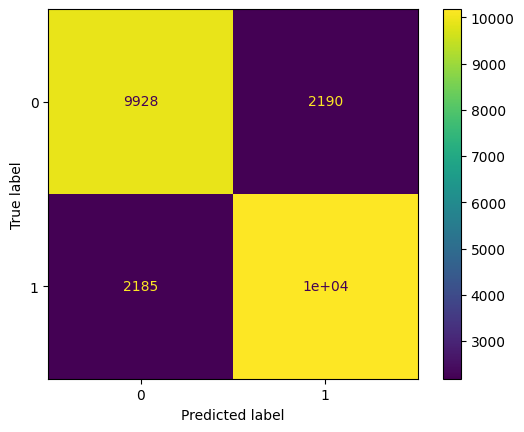

accuracy = 0.8212972796340168, precision = 0.8229444579189911, recall = 0.8232772565512779, f1 = 0.8231108235960053


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score

# Делаем предсказания на тестовой выборке
y_pred = knn.predict(X_test_scaled)

# Строим матрицу ошибок
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.show()


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}')



---


**2.1.2 Кросс-валидация (CV)**


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_neighbors": list(range(5, 17, 2)),
    "weights": ["uniform", "distance"]
}

knn = KNeighborsClassifier(n_jobs=4)

clf = RandomizedSearchCV(knn, param_grid, n_jobs=4, n_iter=3, verbose=2, cv=3)
clf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=4), n_iter=3,
                   n_jobs=4,
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [ ]:
knn_cv = clf.best_estimator_

Строим матрицу ошибок для knn после cv и замеряем метрики

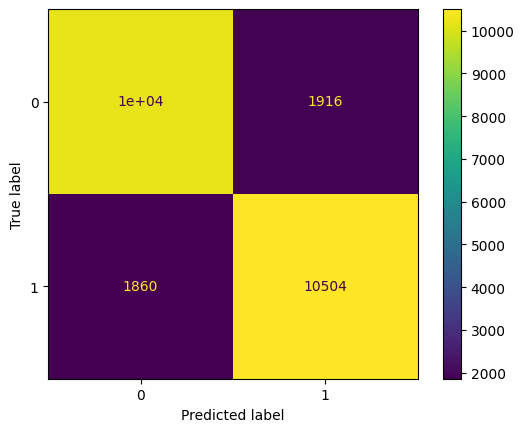

accuracy = 0.8457642349481251, precision = 0.8457326892109501, recall = 0.8495632481397606, f1 = 0.8476436410587476


In [ ]:

# Делаем предсказания на тестовой выборке
y_pred = knn_cv.predict(X_test_scaled)

# Строим матрицу ошибок
ConfusionMatrixDisplay.from_estimator(knn_cv, X_test_scaled, y_test)
plt.show()


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}')

In [ ]:
knn_cv.score(X_test_scaled, y_test)

0.8457642349481251

**После кросс-валидации модель стала показывать результаты лучше.**

---


---




**2.2 Random Forest**



---

Преимущества ансамблей:

*  Комбинация снижает вариативность и ошибку обобщения.
*  Высокая точность
*  Устойчивость к переобучению
*  Оценка важности признаков

Недостатки ансамблей:

*  Сложность интерпретации
*  Вычислительная сложность: требует больше ресурсов для обучения и прогнозирования на больших данных.


---
Бэггинг - тип ансамблей, использующий параллельное обучение на подвыборках.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=4)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=4)

In [ ]:
forest.score(X_test_scaled, y_test)

0.8492361735152357

Строим матрицу ошибок для Random Forest и замеряем метрики

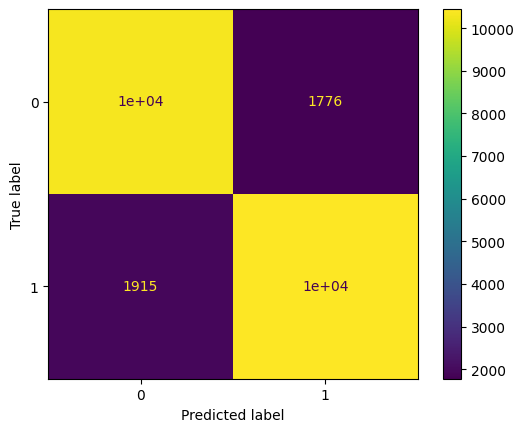

accuracy = 0.8492361735152357, precision = 0.8547239263803681, recall = 0.8451148495632481, f1 = 0.8498922282321363


In [ ]:
# Делаем предсказания на тестовой выборке
y_pred = forest.predict(X_test_scaled)

# Строим матрицу ошибок
ConfusionMatrixDisplay.from_estimator(forest, X_test_scaled, y_test)
plt.show()


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}')

In [ ]:
forest.score(X_test_scaled, y_test)

Random forest дает еще лучшие результаты по сравнению с knn


**2.3 Gradient boosting**

---

Преимущества ансамблей:

*  Комбинация снижает вариативность и ошибку обобщения.
*  Высокая точность
*  Устойчивость к переобучению
*  Оценка важности признаков

Недостатки ансамблей:

*  Сложность интерпретации
*  Вычислительная сложность: требует больше ресурсов для обучения и прогнозирования на больших данных.



---


Бустинг - тип ансамблей, использующий последовательное исправление ошибок

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [ ]:
gbc.score(X_test_scaled, y_test)

0.7446287068049996

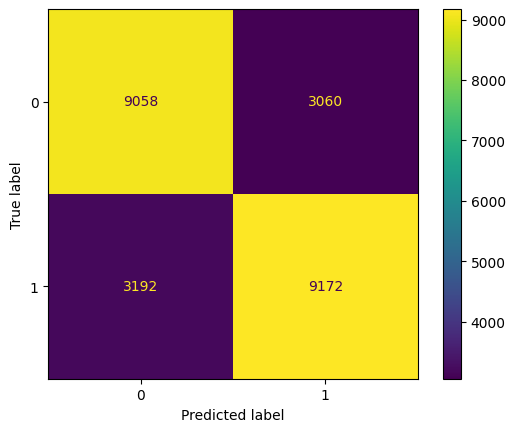

accuracy = 0.7446287068049996, precision = 0.749836494440811, recall = 0.7418311226140407, f1 = 0.7458123272076761


In [ ]:
# Делаем предсказания на тестовой выборке
y_pred = gbc.predict(X_test_scaled)

# Строим матрицу ошибок
ConfusionMatrixDisplay.from_estimator(gbc, X_test_scaled, y_test)
plt.show()


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}')

**2.4 Neural network**


---

Попробуем использовать neural network classification и посмотрим, какие результаты он даст

In [24]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(68,)))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [25]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [26]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

X_train_scaled_train, X_valid, y_train_train, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.15)

model.fit(X_train_scaled_train, y_train_train, epochs=30, callbacks=[early_stopping_cb], validation_data=(X_valid, y_valid))

Epoch 1/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7302 - loss: 0.4982 - val_accuracy: 0.7434 - val_loss: 0.4693
Epoch 2/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7539 - loss: 0.4523 - val_accuracy: 0.7506 - val_loss: 0.4593
Epoch 3/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7604 - loss: 0.4448 - val_accuracy: 0.7577 - val_loss: 0.4522
Epoch 4/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7718 - loss: 0.4297 - val_accuracy: 0.7593 - val_loss: 0.4482
Epoch 5/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7791 - loss: 0.4202 - val_accuracy: 0.7664 - val_loss: 0.4416
Epoch 6/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7895 - loss: 0.4064 - val_accuracy: 0.7744 - val_loss: 0.4366
Epoch 7/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7975 - loss: 0.3942 - val_accuracy: 0.7749 - val_loss: 0.4318
Epoch 8/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8108 - loss: 0

In [28]:
model.evaluate(X_test_scaled, y_test)

766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8097 - loss: 0.4286


[0.43375882506370544, 0.8077771663665771]

Как мы видим, модель показала себя хуже, чем knn или Random Forest, но лучше модели Gradient boosting.